In [24]:
from pathlib import Path
from collections import Counter


data = '''###############
#...#...#.....#
#.#.#.#.#.###.#
#S#...#.#.#...#
#######.#.#.###
#######.#.#...#
#######.#.###.#
###..E#...#...#
###.#######.###
#...###...#...#
#.#####.#.###.#
#.#...#.#.#...#
#.#.#.#.#.#.###
#...#...#...###
###############'''
data = Path('20.txt').read_text()

In [25]:
maze = []
for y,l in enumerate(data.splitlines()):
    for x,c in enumerate(l):
        if c != '#':
            
            maze.append((x,y))
        if c == 'S':
            start = (x, y)
        if c == 'E':
            end = (x, y)
        

In [26]:
start, end , maze[:10]

((61, 49),
 (69, 69),
 [(1, 1),
  (2, 1),
  (3, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1)])

In [27]:
nsew = [(-1,0),(1,0),(0, -1),(0, 1)]

In [28]:
import numba

In [29]:
@numba.jit
def demijik(maze, start, nsew):
    dist = dict()
    open = [(0, start)]
    while open:
        score, (x, y) = open.pop()
        dist[(x,y)] = score
        if (x,y) == end:
            return dist
        neigh = [(x+dx, y+dy) for (dx, dy) in nsew if (x+dx, y+dy) in maze and  (x+dx, y+dy) not in dist]
        assert len(neigh) == 1, (neigh, dist)
        nx, ny = neigh[0]
        open.append((score+1, (nx, ny)))
        

race = demijik(maze, start, nsew)

In [30]:
raceorder = sorted(race.keys(), key=lambda x:race[x])
# raceorder

In [31]:
len(raceorder)

9453

In [32]:
max(race.values()) 

9452

In [33]:
def count(race):
    for (x,y),t in race.items():
        pot_short = [(x+2*dx, y+2*dy) for (dx, dy) in nsew]
        t_short = [race.get((x,y), None) for (x,y) in pot_short]
        yield from [nt-t-2 for nt  in t_short if nt is not None]
    
    

```
There are 14 cheats that save 2 picoseconds.
There are 14 cheats that save 4 picoseconds.
There are 2 cheats that save 6 picoseconds.
There are 4 cheats that save 8 picoseconds.
There are 2 cheats that save 10 picoseconds.
There are 3 cheats that save 12 picoseconds.
There is one cheat that saves 20 picoseconds.
There is one cheat that saves 36 picoseconds.
There is one cheat that saves 38 picoseconds.
There is one cheat that saves 40 picoseconds.
There is one cheat that saves 64 picoseconds.
```

In [34]:
ct = Counter([c for c in count(race) if c>0]) ## 4108 to hight

In [35]:
for k in sorted(ct.keys()):
    print(ct[k], ' that saves', k ,'picos')

980  that saves 2 picos
980  that saves 4 picos
263  that saves 6 picos
433  that saves 8 picos
194  that saves 10 picos
329  that saves 12 picos
138  that saves 14 picos
227  that saves 16 picos
89  that saves 18 picos
178  that saves 20 picos
76  that saves 22 picos
162  that saves 24 picos
67  that saves 26 picos
123  that saves 28 picos
52  that saves 30 picos
88  that saves 32 picos
39  that saves 34 picos
81  that saves 36 picos
36  that saves 38 picos
72  that saves 40 picos
29  that saves 42 picos
63  that saves 44 picos
26  that saves 46 picos
63  that saves 48 picos
32  that saves 50 picos
59  that saves 52 picos
26  that saves 54 picos
47  that saves 56 picos
19  that saves 58 picos
46  that saves 60 picos
19  that saves 62 picos
39  that saves 64 picos
14  that saves 66 picos
37  that saves 68 picos
17  that saves 70 picos
30  that saves 72 picos
13  that saves 74 picos
30  that saves 76 picos
9  that saves 78 picos
25  that saves 80 picos
12  that saves 82 picos
28  that s

In [36]:
sum([v for k,v in ct.items() if k >=100]) # 1254 

1524

In [77]:
from functools import lru_cache

@numba.jit
def manathan(A,B):
    (x,y), (X, Y) = A, B
    return abs(X-x)+abs(Y-y)

In [109]:
@numba.jit
def count2(raceorder, race, delta=100):
    acc = []
    for t,(x,y) in enumerate(raceorder):
        #if t % 500 == 0:
        #    print('\r', t)
        pot_short = [(nx, ny) for (nx, ny) in raceorder[t+delta:] if manathan((nx,ny),(x,y)) <=20]
        pot_short = [(x,y) for (x,y) in pot_short if (x,y) in race] 
        t_short = [race[(nx,ny)]-manathan((nx,ny),(x,y)) for (nx,ny) in pot_short]
        longest = [(nx,ny) for (nx,ny) in pot_short if (race[(nx,ny)]-manathan((nx,ny),(x,y)) -t) == 9420]
        if longest:
            print('jump from', (x, y), 'to', longest)
        acc.extend([nt-t for nt  in t_short if nt is not None])
    return acc

In [110]:
ct[9420]

1

In [118]:
%time res = count2(raceorder, race, delta=100)
ct = Counter([c for c in res if c>0])
s = sum([v for k,v in ct.items() if k >=100]) # 1524
#assert s == 1524
for k in sorted(ct.keys()):
    if k >= 100:
        print(ct[k], ' that saves', k ,'picos')
s # 1033746

jump from (69, 49) to [(69, 69)]
CPU times: user 272 ms, sys: 9.29 ms, total: 281 ms
Wall time: 283 ms
9484  that saves 100 picos
5132  that saves 102 picos
9322  that saves 104 picos
4940  that saves 106 picos
8206  that saves 108 picos
4856  that saves 110 picos
8899  that saves 112 picos
4813  that saves 114 picos
8521  that saves 116 picos
4533  that saves 118 picos
7715  that saves 120 picos
4396  that saves 122 picos
7634  that saves 124 picos
4369  that saves 126 picos
7514  that saves 128 picos
4192  that saves 130 picos
6914  that saves 132 picos
4170  that saves 134 picos
7030  that saves 136 picos
4055  that saves 138 picos
7148  that saves 140 picos
3975  that saves 142 picos
7050  that saves 144 picos
3940  that saves 146 picos
6650  that saves 148 picos
3823  that saves 150 picos
6581  that saves 152 picos
3896  that saves 154 picos
6267  that saves 156 picos
3815  that saves 158 picos
6338  that saves 160 picos
3839  that saves 162 picos
6373  that saves 164 picos
3745  

1033746

In [114]:
start, end

((61, 49), (69, 69))

In [59]:
%timeit count2(raceorder, race, delta=1000)

KeyboardInterrupt: 

    There are 32 cheats that save 50 picoseconds.
    There are 31 cheats that save 52 picoseconds.
    There are 29 cheats that save 54 picoseconds.
    There are 39 cheats that save 56 picoseconds.
    There are 25 cheats that save 58 picoseconds.
    There are 23 cheats that save 60 picoseconds.
    There are 20 cheats that save 62 picoseconds.
    There are 19 cheats that save 64 picoseconds.
    There are 12 cheats that save 66 picoseconds.
    There are 14 cheats that save 68 picoseconds.
    There are 12 cheats that save 70 picoseconds.
    There are 22 cheats that save 72 picoseconds.
    There are 4 cheats that save 74 picoseconds.
    There are 3 cheats that save 76 picoseconds.


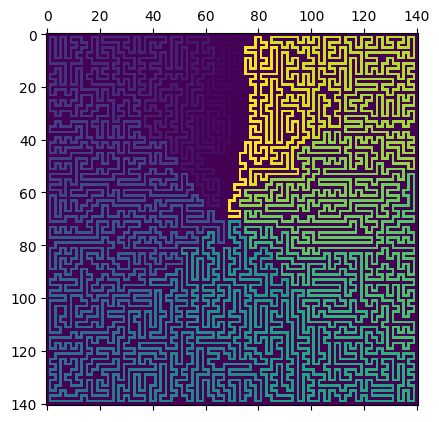

In [116]:
S = max([x for x,_ in raceorder])+1
import numpy as np
import seaborn as sns
a = np.zeros((S+1,S+1))
for i,(x,y) in enumerate(raceorder):
    a[y,x] = i

#sns.heatmap(a, annot=S < 10)
import matplotlib.pyplot as plt
plt.matshow(a)

In [117]:
manathan(start, end)

28

In [ ]:
@numba.jit
def count3(raceorder, race, delta=100):
    acc = []
    for t,(x,y) in enumerate(raceorder):
        #if t % 500 == 0:
        #    print('\r', t)
        pot_short = [(nx, ny) for (nx, ny) in raceorder[t+delta:] if manathan((nx,ny),(x,y)) <=20]
        pot_short = [(x,y) for (x,y) in pot_short if (x,y) in race] 
        t_short = [race[(nx,ny)]-manathan((nx,ny),(x,y)) for (nx,ny) in pot_short]
        longest = [(nx,ny) for (nx,ny) in pot_short if (race[(nx,ny)]-manathan((nx,ny),(x,y)) -t) == 9420]
        if longest:
            print('jump from', (x, y), 'to', longest)
        acc.extend([nt-t for nt  in t_short if nt is not None])
    return acc